In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 匯入套件



In [27]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

## 讀取圖片

In [28]:
np.random.seed(10)
def read_directory(directory_name):
    array_of_img=[]
    
    for filename in os.listdir(r"/"+directory_name):
        img = load_img(directory_name + "/" + filename, target_size=(160, 160))
        array_of_img.append(img)
    
    return array_of_img  
        
X_train_food_list = read_directory("/content/drive/MyDrive/AI_共用/辨識是否為食物/food5k-image-dataset/training/food")
X_train_nonfood_list = read_directory("/content/drive/MyDrive/AI_共用/辨識是否為食物/food5k-image-dataset/training/non_food")
X_train_menu_list = read_directory("/content/drive/MyDrive/AI_共用/identify_food&menu/菜單圖片/training/")

X_test_food_list = read_directory("/content/drive/MyDrive/AI_共用/辨識是否為食物/food5k-image-dataset/evaluation/food")
X_test_nonfood_list = read_directory("/content/drive/MyDrive/AI_共用/辨識是否為食物/food5k-image-dataset/evaluation/non_food")
X_test_menu_list = read_directory("/content/drive/MyDrive/AI_共用/identify_food&menu/菜單圖片/evaluation/")

print("訓練資料集：")
print("食物：" + str(len(X_train_food_list)))
print("不是食物：" + str(len(X_train_nonfood_list)))
print("菜單：" + str(len(X_train_menu_list)),end="\n\n")

print("測試資料集：")
print("食物：" + str(len(X_test_food_list)))
print("不是食物：" + str(len(X_test_nonfood_list)))
print("菜單：" + str(len(X_test_menu_list)))

訓練資料集：
食物：2000
不是食物：2000
菜單：807

測試資料集：
食物：500
不是食物：500
菜單：200


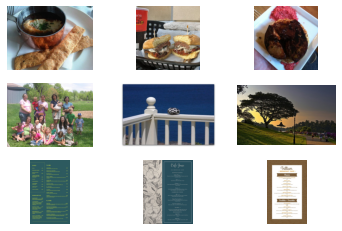

In [29]:
fig = plt.subplot()
img = mpimg.imread("/content/drive/MyDrive/AI_共用/辨識是否為食物/food5k-image-dataset/training/food/0.jpg",)
plt.subplot(331)
plt.imshow(img)
plt.axis('off')
img = mpimg.imread("/content/drive/MyDrive/AI_共用/辨識是否為食物/food5k-image-dataset/training/food/1.jpg")
plt.subplot(332)
plt.imshow(img)
plt.axis('off')
img = mpimg.imread("/content/drive/MyDrive/AI_共用/辨識是否為食物/food5k-image-dataset/training/food/2.jpg")
plt.subplot(333)
plt.imshow(img)
plt.axis('off')

img = mpimg.imread("/content/drive/MyDrive/AI_共用/辨識是否為食物/food5k-image-dataset/training/non_food/50.jpg")
plt.subplot(334)
plt.imshow(img)
plt.axis('off')
img = mpimg.imread("/content/drive/MyDrive/AI_共用/辨識是否為食物/food5k-image-dataset/training/non_food/60.jpg")
plt.subplot(335)
plt.imshow(img)
plt.axis('off')
img = mpimg.imread("/content/drive/MyDrive/AI_共用/辨識是否為食物/food5k-image-dataset/training/non_food/5.jpg")
plt.subplot(336)
plt.imshow(img)
plt.axis('off')

img = mpimg.imread("/content/drive/MyDrive/AI_共用/identify_food&menu/菜單圖片/training/Casual Colorful Mexican Menu2.jpg")
plt.subplot(337)
plt.imshow(img)
plt.axis('off')
img = mpimg.imread("/content/drive/MyDrive/AI_共用/identify_food&menu/菜單圖片/training/American Food Cafe Menu1.jpg")
plt.subplot(338)
plt.imshow(img)
plt.axis('off')
img = mpimg.imread("/content/drive/MyDrive/AI_共用/identify_food&menu/菜單圖片/training/Breakfast Food Menu1.jpg")
plt.subplot(339)
plt.imshow(img)
plt.axis('off')

plt.show()

## 圖片轉換至numpy

In [30]:
X_train = np.empty((len(X_train_food_list)+len(X_train_nonfood_list)+len(X_train_menu_list),160,160,3))
X_test = np.empty((len(X_test_food_list)+len(X_test_nonfood_list)+len(X_test_menu_list),160,160,3))
print(len(X_train))
print(len(X_test))
print(X_train.shape)
print(X_test.shape)

4807
1200
(4807, 160, 160, 3)
(1200, 160, 160, 3)


In [31]:
for i in range(0,len(X_train_food_list)):
    X_train[i] = img_to_array(X_train_food_list[i])
    
for i in range(len(X_train_food_list),len(X_train_food_list) + len(X_train_nonfood_list)):
    X_train[i] = img_to_array(X_train_nonfood_list[i-len(X_train_food_list)])
    
for i in range(len(X_train_food_list) + len(X_train_nonfood_list),len(X_train_food_list) + len(X_train_nonfood_list) + len(X_train_menu_list)):
    X_train[i] = img_to_array(X_train_menu_list[i - len(X_train_food_list) - len(X_train_nonfood_list)])

    
for i in range(0,len(X_test_food_list)):
    X_test[i] = img_to_array(X_test_food_list[i])
    
for i in range(len(X_test_food_list),len(X_test_food_list) + len(X_test_nonfood_list)):
    X_test[i] = img_to_array(X_test_nonfood_list[i-len(X_test_food_list)])

for i in range(len(X_test_food_list) + len(X_test_nonfood_list),len(X_test_food_list) + len(X_test_nonfood_list) + len(X_test_menu_list)):
    X_test[i] = img_to_array(X_test_nonfood_list[i - len(X_test_food_list) - len(X_test_nonfood_list)])

print(len(X_train))
print(len(X_test))
print(X_train.shape)
print(X_test.shape)

4807
1200
(4807, 160, 160, 3)
(1200, 160, 160, 3)


In [32]:
#執行正規化, 從 0-255 至 0-1
#X_train = X_train / 255
#X_test = X_test / 255

In [33]:
Y_train = np.zeros(len(X_train))
Y_test = np.zeros(len(X_test))
for i in range(0, 2000):
    Y_train[i] = 0
for i in range(2000, 4000):
    Y_train[i] = 1
for i in range(4000, 4807):
    Y_train[i] = 2
    
for i in range(0, 500):
    Y_test[i] = 0
for i in range(500, 1000):
    Y_test[i] = 1
for i in range(1000, 1200):
    Y_test[i] = 2

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(len(Y_train))
print(len(Y_test))
print(Y_train.shape)
print(Y_test.shape)

4807
1200
(4807, 3)
(1200, 3)


## One-Hot編碼

In [34]:
print("食物：    ",end="")
print(Y_train[0])
print("不是食物：",end="")
print(Y_train[2000])
print("菜單：    ",end="")
print(Y_train[4000])

食物：    [1. 0. 0.]
不是食物：[0. 1. 0.]
菜單：    [0. 0. 1.]


In [35]:
def shuffle_in_unison_scary(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

shuffle_in_unison_scary(X_train, Y_train)
shuffle_in_unison_scary(X_test, Y_test)

## 載入模型

In [36]:
resnet_model = ResNet50(weights="imagenet", include_top=False, input_shape=(160, 160, 3))

In [37]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [38]:
model = Sequential()
model.add(resnet_model)
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
#model.add(Dense(50))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))
model.summary()   # 顯示模型摘要資訊

resnet_model.trainable = False

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 2048)        0         
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23,593,859
Trainable params: 23,540,739
Non-trainable params: 53,120
_____________________________________

In [39]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
es = EarlyStopping(monitor = "val_loss", mode = "auto", patience = 3, verbose = 1)
mc = ModelCheckpoint("/content/drive/MyDrive/AI_共用/identify_food&menu/160*160_best_model.h5", monitor="val_loss", mode="auto", verbose=1,
                     save_best_only=True)

In [41]:
import time
time_start = time.time() #開始計時

## 模型訓練狀況

In [42]:
history = model.fit(X_train, Y_train, validation_split=0.3, 
                    epochs=50, batch_size=75, callbacks = [es, mc])

Epoch 1/50
45/45 [==============================] - ETA: 0s - loss: 0.4950 - accuracy: 0.8407
Epoch 1: val_loss improved from inf to 0.05110, saving model to /content/drive/MyDrive/AI_共用/identify_food&menu/160*160_best_model.h5
45/45 [==============================] - 13s 226ms/step - loss: 0.4950 - accuracy: 0.8407 - val_loss: 0.0511 - val_accuracy: 0.9834
Epoch 2/50
45/45 [==============================] - ETA: 0s - loss: 0.1272 - accuracy: 0.9602
Epoch 2: val_loss improved from 0.05110 to 0.04504, saving model to /content/drive/MyDrive/AI_共用/identify_food&menu/160*160_best_model.h5
45/45 [==============================] - 8s 190ms/step - loss: 0.1272 - accuracy: 0.9602 - val_loss: 0.0450 - val_accuracy: 0.9854
Epoch 3/50
45/45 [==============================] - ETA: 0s - loss: 0.0933 - accuracy: 0.9721
Epoch 3: val_loss improved from 0.04504 to 0.03583, saving model to /content/drive/MyDrive/AI_共用/identify_food&menu/160*160_best_model.h5
45/45 [==============================] - 10s 

In [43]:
time_end = time.time()    #結束計時

time_c= time_end - time_start   #執行所花時間
print('time cost', time_c, 's')

time cost 121.66852498054504 s


## 評估模型

In [44]:
print("\nTesting ...")
loss, accuracy = model.evaluate(X_train, Y_train)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))


Testing ...
151/151 [==============================] - 9s 58ms/step - loss: 0.0156 - accuracy: 0.9946
訓練資料集的準確度 = 0.99
38/38 [==============================] - 2s 60ms/step - loss: 2.9158 - accuracy: 0.8242
測試資料集的準確度 = 0.82


In [45]:
# 儲存Keras模型
#print("Saving Model: resnet50.h5 ...")
#model.save("resnet50.h5")

## 繪圖

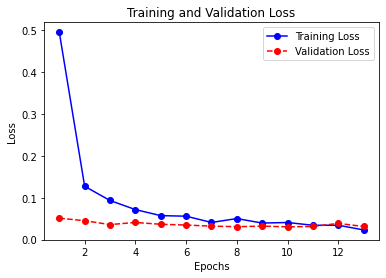

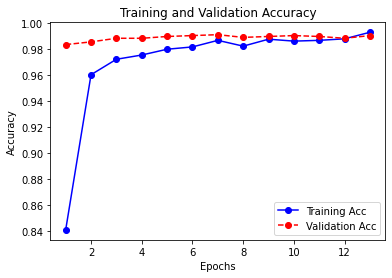

In [46]:
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

(1, 160, 160, 3)


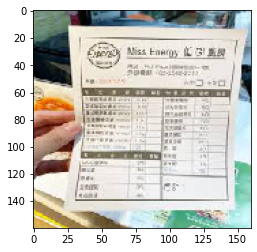

In [47]:
img = load_img("/content/drive/MyDrive/AI_共用/辨識是否為食物/photo.jpg", target_size=(160, 160))
plt.imshow(img)
x = img_to_array(img)
x = preprocess_input(x)
img = x.reshape(1,x.shape[0],x.shape[1],x.shape[2])
print(img.shape)

In [48]:
np.set_printoptions(suppress=True, precision=5)
result = model.predict(img)
print(result)
maxindex = np.argmax(result)
print(maxindex)

[[0.00019 0.00001 0.9998 ]]
2
